# Importa bibliotecas

In [1]:
import os
path = os.path.abspath('')
# print(path)
items = os.listdir(path)
if 'Funcoes_GETS.py' not in items:
    ! jupyter nbconvert --to 'python' Funcoes_GETS.ipynb
import Funcoes_GETS as fg

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from bqplot import pyplot as bqplt
import bqplot as bq
%matplotlib notebook 

# Carrega banco de dados

In [2]:
equips_data = fg.get_all_equips_data()
OS_data = fg.get_all_OS_data()
OS_data = OS_data.dropna(subset=['Tipo Equip.'])
material_cost_data = fg.load_material_cost_data()
external_cost_data = fg.load_external_cost_data()
# equip_type = np.sort(equips_data['Tipo Equipamento'].unique())
equip_type = np.sort(equips_data['Tipo Equipamento'].unique())

# Gera interface

In [3]:
# np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In [4]:
def update_data(equip,start_date,end_date):
    import pandas as pd
    import numpy as np
    from datetime import date
    today = pd.to_datetime(date.today()).to_numpy()
    if len(equip)==1:
        equip = equip[0]
    available_equips, equip_amount_data = fg.get_available_equip(equip,equips_data,OS_data)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    x_data1,y_data1,x_data2,y_data2 = fg.arrange_equip_data_to_plot(available_equips,equip_amount_data,start_date,end_date)
    
    #Checks for empty data (necessary to adjust y axis limits)
    empty_flag1,between_two_dates1 = fg.check_for_empty_data(equip_amount_data,start_date,end_date)
    empty_flag2,between_two_dates2 = fg.check_for_empty_data(available_equips,start_date,end_date)
    if empty_flag2==False:
        ymin = np.amin(available_equips[between_two_dates2]['Quantidade Disponível'].values.astype(int))
    else:
        ymin = 0
    if empty_flag1==False:
        ymax = np.amax(equip_amount_data[between_two_dates1]['Quantidade de Equipamentos'].values.astype(int))
    else:
        ymax = np.amax(equip_amount_data['Quantidade de Equipamentos'].values.astype(int))
    return(x_data1,y_data1,x_data2,y_data2,ymin,ymax)

def update_data2(equip,start_date,end_date):
    import pandas as pd
    if len(equip)==1:
        equip = equip[0]
    #TEMP###
    available_equips, equip_amount_data = fg.get_available_equip(equip,equips_data,OS_data)
    ######
    material_monthly_cost = fg.get_equip_monthly_cost(equip,material_cost_data)
    external_monthly_cost = fg.get_equip_monthly_cost(equip,external_cost_data)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    x_data1,y_data1,x_data2,y_data2,x_data3,y_data3 = fg.arrange_cost_data_to_plot(material_monthly_cost,external_monthly_cost,equip_amount_data,start_date,end_date)
    #Checks for empty data (necessary to adjust y axis limits)
    empty_flag1,between_two_dates1 = fg.check_for_empty_data(equip_amount_data,start_date,end_date)
    empty_flag2,between_two_dates2 = fg.check_for_empty_data(material_monthly_cost,start_date,end_date)
    empty_flag3,between_two_dates3 = fg.check_for_empty_data(external_monthly_cost,start_date,end_date)
    
    if empty_flag1==False:
        ymin = np.amin(equip_amount_data[between_two_dates1]['Quantidade de Equipamentos'].values.astype(int))
        ymax = np.amax(equip_amount_data[between_two_dates1]['Quantidade de Equipamentos'].values.astype(int))
    else:
        ymin = 0
        ymax = np.amax(equip_amount_data['Quantidade de Equipamentos'].values.astype(int))
    
    if selected_analysis.value==1:
        if empty_flag2==False:
            ymax2 = np.amax(material_monthly_cost[between_two_dates2].values)
        else:
            ymax2 = 1
    elif selected_analysis.value==2:
        if empty_flag3==False:
            ymax2 = np.amax(external_monthly_cost[between_two_dates3].values)
        else:
            ymax2 = 1
    else:
        if empty_flag2==False:
            if empty_flag3==False:
                # matches lenghts of x_data2 with x_data3 (add missing dates in x_data and add zeros in missing y_data) 
                i=0
                while x_data3[i] < x_data2[i]:
                    x_data2 = np.insert(x_data2,i,x_data3[i])
                    y_data2 = np.insert(y_data2,0,0)
                    i+=1
                i=0
                while x_data2[i] < x_data3[i]:
                    x_data3 = np.insert(x_data3,i,x_data2[i])
                    y_data3 = np.insert(y_data3,0,0)
                    i+=1
                if len(x_data2)>len(x_data3):
                    y_data3 = np.append(y_data3,np.zeros(len(x_data2)-len(x_data3)))
                    x_data3 = np.append(x_data3,x_data2[len(x_data3):])
                    x_data3 = pd.to_datetime(x_data3)
                elif len(x_data2)<len(x_data3):
                    y_data2 = np.append(y_data2,np.zeros(len(x_data3)-len(x_data2)))
                    x_data2 = np.append(x_data2,x_data3[len(x_data2):])
                    x_data2 = pd.to_datetime(x_data2)
                
                ymax2 = np.amax(np.concatenate((material_monthly_cost[between_two_dates2].values,
                                               external_monthly_cost[between_two_dates3].values)))
            else:
                ymax2 = np.amax(material_monthly_cost[between_two_dates2].values)
        else:
            if empty_flag3==False:
                 ymax2 = np.amax(external_monthly_cost[between_two_dates3].values)
            else:
                ymax2 = 1
    
    
    return(x_data1,y_data1,x_data2,y_data2,x_data3,y_data3,ymin,ymax,ymax2)

title = widgets.Label(value="Interface de Análise Temporal do GETS",
                      layout=widgets.Layout(border= '2px solid black',width='100%', display='flex', align_items='center',
                                           justify_content='center'))

tab_titles = ['Quantidade','Custo']
tab = widgets.Tab()
[tab.set_title(i, title) for i, title in enumerate(tab_titles)]

fig = bq.Figure()
tb = bq.Toolbar(figure=fig)
fig2 = bq.Figure()
tb2 = bq.Toolbar(figure=fig2)


label1 = widgets.Label(value="Tipo de Medida:")
label2 = widgets.Label(value="Equipamento:")
label3 = widgets.Label(value="Data Inicial:")
label4 = widgets.Label(value="Data Final:")
label5 = widgets.Label(value="Mostrar Tendência?")
error_label = widgets.Label(value='')

analysis_types = [('Custo Total de Material/Mês',1), ('Custo Total de Serviço Externo/Mês',2),('Custos Totais/Mês',3)]
selected_analysis = widgets.Dropdown(
    options=analysis_types,
    value=1,
    description='',
    disabled=False,
)

selected_equips = widgets.Combobox(
    options=equip_type.tolist(),
    placeholder='Ex: VENTILADOR UTI',
    value='',
    #rows=10,
    ensure_option=True,
    disabled=False
)
tendency = widgets.Checkbox(
    value=False,
    description='Mostrar linha de tendência',
    disabled=False,
    indent=False
)
# hbox = widgets.HBox([label5, tendency],layout=widgets.Layout(display='flex',align_items='stretch'))
selected_start_date = widgets.DatePicker(
    description='',
    disabled=False,
    value=pd.to_datetime('2013-01-01')
)
selected_end_date = widgets.DatePicker(
    description='',
    disabled=False,
    value=pd.to_datetime('2020-09-01')
)


def on_change(b):
    error_label.value = ''
    if selected_start_date.value==None:
        error_label.value = 'Por favor selecione uma data inicial!'
    elif selected_end_date.value==None:
        error_label.value = 'Por favor selecione uma data final!'
    elif selected_equips.value=='':
        error_label.value = 'Por favor selecione um equipamento!'
    else:
        
        if tab.selected_index==0:
            
            
            x_data1,y_data1,x_data2,y_data2,ymin,ymax = update_data(selected_equips.value,selected_start_date.value,selected_end_date.value)
            
            global xo, yo
            xo = x_data2
            yo = y_data2
            
            x_dt = bq.DateScale()
            y_sc = bq.LinearScale()
            interp = 'linear'
            def_tt = bq.Tooltip(fields=['x', 'y'], formats=['%d-%b-%y', 'd'],labels=['Data','Quant.'])

            scatter1 = bq.Scatter(x=x_data1, y=y_data1, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
                                  scales={'x': x_dt, 'y': y_sc}, tooltip=def_tt)
            line1 = bq.Lines(x=x_data1, y=y_data1, scales={'x': x_dt, 'y': y_sc}, display_legend=True, labels=['Ativo'],
                             interpolation=interp)
            line1.fill = 'bottom'
            line1.marker = 'square'
            line1.marker_size = 20
            line1.fill_opacities = [0.2]
            scatter2 = bq.Scatter(x=x_data2, y=y_data2, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
                                  scales={'x': x_dt, 'y': y_sc}, tooltip=def_tt)
            line2 = bq.Lines(x=x_data2, y=y_data2, scales={'x': x_dt, 'y': y_sc}, display_legend=True, 
                             labels=['Disponível'],interpolation=interp, tooltip=def_tt)
            line2.fill = 'bottom'
            line2.marker = 'circle'
            line2.fill_opacities = [0.2]
            line2.colors = ['DarkOrange']
            line2.marker_size = 8
            line2.opacities = [.5]

            ax_x = bq.Axis(scale=x_dt, label='Data', 
                          tick_style={'stroke': 'black', 'font-size': 12}, tick_format="%b %Y", num_ticks=8)
            x_dt.min = pd.to_datetime(selected_start_date.value)
            x_dt.max = pd.to_datetime(selected_end_date.value)
#             ax_x.tick_rotate=-45
            if (pd.to_datetime(selected_end_date.value) - pd.to_datetime(selected_start_date.value)).days<240:
                ax_x.tick_format = "%d-%b-%y"
            
            ax_y = bq.Axis(scale=y_sc, orientation='vertical', label='Quantidade de Equipamentos', 
                           label_style={'stroke': 'black', 'font-size': 12},
                           tick_style={'stroke': 'black', 'font-size': 12},grid_lines='none')
            y_sc.min = np.around(0.9*ymin)
            y_sc.max = np.around(1.1*ymax)

            fig.marks = [line1,line2,scatter1,scatter2]
            fig.axes = [ax_x,ax_y]
            fig.legend_location = 'top-left'
            
        else:
            x_data1,y_data1,x_data2,y_data2,x_data3,y_data3,ymin,ymax,ymax2 = update_data2(selected_equips.value,
                                                                                           selected_start_date.value,
                                                                                           selected_end_date.value)
            x_dt = bq.DateScale()
            y_sc1 = bq.LinearScale()
            y_sc2 = bq.LinearScale()
            interp = 'linear'
            def_tt = bq.Tooltip(fields=['x', 'y'], formats=['%d-%b-%y', 'd'],labels=['Data','Quant.'])
            scatter1 = bq.Scatter(x=x_data1, y=y_data1, colors=['#ff77ff00'], stroke_width=1, display_legend=False,
                                  scales={'x': x_dt, 'y': y_sc1}, tooltip=def_tt)
            line1 = bq.Lines(x=x_data1, y=y_data1, scales={'x': x_dt, 'y': y_sc1}, display_legend=True, 
                             labels=['Ativo'],interpolation=interp)
            line1.fill = 'bottom'
            line1.marker = 'square'
            line1.marker_size = 20
            line1.fill_opacities = [0.2]
            def_tt2 = bq.Tooltip(fields=['x', 'y'], formats=['%b %Y', '.2f'],labels=['Mês/Ano','Custo'])
            bar2 = bq.Bars(x=x_data2,y=y_data2, scales={'x': x_dt, 'y': y_sc2},tooltip=def_tt2,display_legend=True, 
                             labels=['Materiais'])
            bar2.colors = ['Red']
            bar2.opacities = [0.5]
            
            bar3 = bq.Bars(x=x_data3,y=y_data3, scales={'x': x_dt, 'y': y_sc2},tooltip=def_tt2,display_legend=True, 
                             labels=['Serviços Externos'])
            bar3.colors = ['Orange']
            bar3.opacities = [0.5]
            
            ax_x = bq.Axis(scale=x_dt, label='Data', xlim=(selected_start_date.value,selected_end_date.value),
                          tick_style={'stroke': 'black', 'font-size': 12}, tick_format="%b %Y", num_ticks=8)
            x_dt.min = pd.to_datetime(selected_start_date.value)
            x_dt.max = pd.to_datetime(selected_end_date.value)
#             ax_x.tick_rotate=-45
            if (pd.to_datetime(selected_end_date.value) - pd.to_datetime(selected_start_date.value)).days<240:
                ax_x.tick_format = "%d-%b-%y"
            
            ax_y1 = bq.Axis(scale=y_sc1, orientation='vertical', label='Quantidade de Equipamentos',
                            tick_style={'stroke': 'black', 'font-size': 12},grid_lines='none')
            ax_y2 = bq.Axis(scale=y_sc2, orientation='vertical', label=selected_analysis.label, 
                            side='right', label_color='OrangeRed',color='red',label_offset='3.5em',
                           tick_style={'stroke': 'OrangeRed', 'font-size': 12},grid_lines='dashed',grid_color='OrangeRed')
            y_sc1.min = np.around(0.9*ymin)
            y_sc1.max = np.around(1.1*ymax)
            y_sc2.min = 0
            y_sc2.max = 1.1*ymax2
            if selected_analysis.value==1:
                fig2.marks = [line1,bar2,scatter1]
            elif selected_analysis.value==2:
                fig2.marks = [line1,bar3,scatter1]
            else:
                bar = bq.Bars(x=x_data2,y=[y_data2,y_data3], scales={'x': x_dt, 'y': y_sc2}, type='grouped',
                              colors=['Red','Orange'],tooltip=def_tt2,display_legend=True, 
                             labels=['Materiais','Serviços Externos']) 
                bar.opacities = [0.5, 0.5]
                fig2.marks = [line1,bar,scatter1]

            bar2.interactions = {
                'legend_hover': 'highlight_axes',
                'hover': 'tooltip', 
            }
            
            fig2.axes = [ax_x,ax_y1,ax_y2]
            fig2.legend_location = 'top-left'

def show_tendency(b):
    print(b)

selected_analysis.observe(on_change,names='value')
selected_equips.observe(on_change,names='value')
selected_start_date.observe(on_change,names='value')
selected_end_date.observe(on_change,names='value')
tab.observe(on_change,names='selected_index')
# tb.observe(on_toolbar,'_panning')
tendency.observe(show_tendency,names='value')

vbox = widgets.VBox([label2,
              selected_equips,
              label3,
              selected_start_date,
              label4,
              selected_end_date,
              tendency,
#               button_plot,
              error_label
             ])

vbox2 = widgets.VBox([label1,
              selected_analysis,
              label2,
              selected_equips,
              label3,
              selected_start_date,
              label4,
              selected_end_date,
#               button_plot,
              error_label
             ])

vbox_fig = widgets.VBox([fig,tb], align_self='stretch')#,layout=center_layout)
vbox_fig2 = widgets.VBox([fig2,tb2], align_self='stretch')#,layout=center_layout)

app = widgets.AppLayout(header=None,
          left_sidebar=vbox,
          center=vbox_fig,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0],
          pane_heights=[0,9,0],
          layout=widgets.Layout(border= ''))

app2 = widgets.AppLayout(header=None,
          left_sidebar=vbox2,
          center=vbox_fig2,
          right_sidebar=None,
          footer=None,
          pane_widths=[2, 4, 0],
          pane_heights=[0,9,0],
          layout=widgets.Layout(border= ''))

children = [app,app2]
tab.children = children

header = widgets.HBox()
header.children = [title]

main_app = widgets.VBox([header,tab])
main_app

In [6]:
xo

DatetimeIndex([       '1989-12-26 00:00:00',        '1989-12-26 00:00:00',
                      '1990-11-22 00:00:00',        '1990-11-22 00:00:00',
                      '1990-11-22 00:00:00',        '1990-11-22 00:00:00',
                      '1990-11-22 00:00:00',        '1992-07-29 00:00:00',
                      '1993-07-13 00:00:00',        '1993-12-02 00:00:00',
               ...
               '2020-09-25 10:00:44.888000', '2020-09-29 12:52:39.859000',
               '2020-09-30 08:51:52.101000', '2020-09-30 08:52:20.912000',
               '2020-09-30 08:52:43.499000', '2020-10-01 13:51:52.101000',
               '2020-10-01 13:52:20.912000', '2020-10-01 13:52:43.499000',
               '2020-10-05 08:36:01.864000',        '2020-10-06 00:00:00'],
              dtype='datetime64[ns]', length=5274, freq=None)

In [7]:
ts = pd.Series(yo, index=xo)

In [8]:
ts1 = ts[ts.index>pd.to_datetime('2010')]

In [9]:
type(ts1)

pandas.core.series.Series

<IPython.core.display.Javascript object>


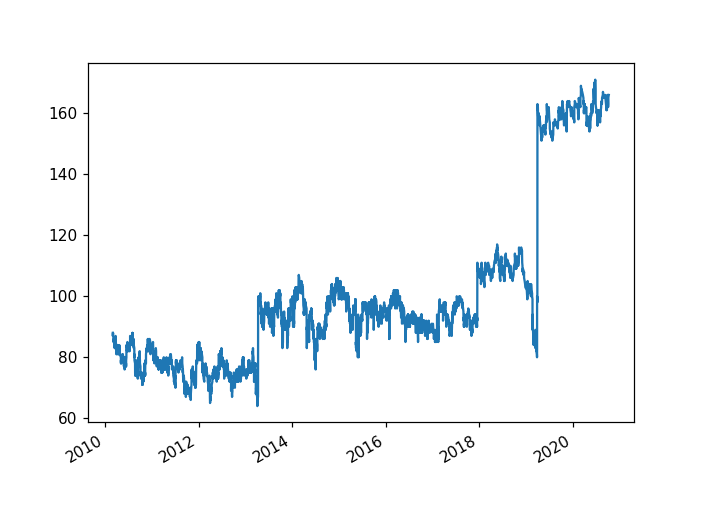

<AxesSubplot:>

In [10]:
ts1.plot()

In [1]:
from pmdarima.arima import auto_arima

Z:\anaconda3\envs\GETS_env3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Z:\anaconda3\envs\GETS_env3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
modelo_auto = auto_arima(ts1, m=12, trace=False)

Z:\anaconda3\envs\GETS_env3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [12]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5184
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -7330.285
Date:                Tue, 06 Oct 2020   AIC                          14670.570
Time:                        18:53:20   BIC                          14703.336
Sample:                             0   HQIC                         14682.033
                               - 5184                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0231      0.037      0.632      0.527      -0.049       0.095
ar.L1         -0.5361      0.127     -4.237      0.000      -0.784      -0.288
ma.L1          0.5873      0.137      4.283      0.000       0.319       0.856
ma.L2          0.0932      0.104      0.896      0.370      -0.111       0.297
sigma2         0.9907      1.112      0.891      0.373      -1.189       3.170
===================================================================================
Ljung-Box (Q):                       44.17   Jarque-Bera (JB):               833.92
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.03
Prob(H) (two-sided):                  0.67   Kurtosis:                         1.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
proximos12 = modelo_auto.predict(n_periods=12)

In [14]:
proximos12

array([166.04483904, 166.03364891, 166.06275592, 166.07025951,
       166.08934476, 166.10222105, 166.11842598, 166.13284641,
       166.14822352, 166.16308776, 166.17822694, 166.19321873])

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
modelo = ARIMA(ts1, order=(1,1,2),freq=ts1.index.inferred_freq)

Z:\anaconda3\envs\GETS_env3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
Z:\anaconda3\envs\GETS_env3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [18]:
modelo_treinado = modelo.fit()

In [19]:
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 5183
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7330.285
Method:                       css-mle   S.D. of innovations              0.995
Date:                Tue, 06 Oct 2020   AIC                          14670.570
Time:                        19:02:29   BIC                          14703.336
Sample:                             1   HQIC                         14682.033
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0150      0.015      0.995      0.320      -0.015       0.045
ar.L1.D.y     -0.5372      0.157     -3.413      0.001      -0.846      -0.229
ma.L1.D.y      0.5884      0.157      3.747      0.000       0.281       0.896
ma.L2.D.y      0.0932      0.014      6.830      0.000       0.066       0.120
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8614           +0.0000j            1.8614            0.5000
MA.1           -3.1567           -0.8743j            3.2755           -0.4570
MA.2           -3.1567           +0.8743j            3.2755            0.4570
-----------------------------------------------------------------------------
"""

In [46]:
plt.plot(a[0])

In [38]:
a = modelo_treinado.forecast(steps=12)

In [43]:
ts1.plot()


<AxesSubplot:>

In [45]:
ax1 = ts1.plot()
modelo_treinado.plot_predict('2019','2020', ax=ax1, plot_insample=True)

<IPython.core.display.Javascript object>